In [1]:
import pandas as pd

In [2]:
mpg = pd.read_csv('mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### Q1. 차량의 종류(manufacturer)가 'audi'인 차량 중에서 도시연비(cty)가 20이하인 것의 평균은?

In [10]:
mpg_20 = mpg.query('manufacturer =="audi" & cty <= 20')
mpg_20.agg(mpg20_mean=('cty','mean'))

,cty
mpg20_mean,17.1875


### Q2. 자동차 모델(model)별 평균 배기량(displ)이 가장 높은 모델 5개는?

In [18]:
mpg_model = mpg.groupby('model', as_index=False).agg(maen_displ = ('displ','mean')).sort_values('maen_displ', ascending=False)
mpg_model.head()

,model,maen_displ
11,corvette,6.16
23,k1500 tahoe 4wd,5.70
5,c1500 suburban 2wd,5.52
29,navigator 2wd,5.40
24,land cruiser wagon 4wd,5.20


### Q3. 자동차 종류(category)별 평균 고속도로 연비(hwy)가 가장 낮은 곳은?

In [19]:
mpg_category = mpg.groupby('category').agg(mean_hwy = ('hwy','mean')).sort_values('mean_hwy', ascending=False)
mpg_category.tail(1)

,mean_hwy
category,
pickup,16.878788


### Q4. 실린더(cyl) 개수에 따른 도시연비(cty)의 평균은?

In [22]:
mpg_cyl = mpg.groupby('cyl').agg(mean_cty = ('cty','mean'))
mpg_cyl

,mean_cty
cyl,
4,21.012346
5,20.500000
6,16.215190
8,12.571429


### Q5. 'audi'인 차량의 도시연비(cty)와 고속도로 연비(hwy)의 평균은?

In [24]:
mpg_audi = mpg.query("manufacturer == 'audi'").assign(tot = (mpg['cty']+mpg['hwy'])/2)
mpg_audi

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,tot
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,20.5
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0


### Q6. 차량의 종류(manufacturer)별 평균 도시연비(cty)를 막대그래프로 나타내기

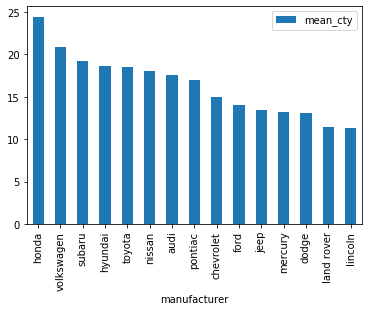

In [31]:
mpg_bar = mpg.groupby('manufacturer').agg(mean_cty = ('cty','mean')).sort_values('mean_cty', ascending=False)
mpg_bar.plot.bar()

### Q7. 도시 연비(cty)가 17이상인 데이터와 고속도로 연비(hwy)가 20이하인 데이터를 병합하시오

In [39]:
mpg_cty17 = mpg.query('cty >= 17')
mpg_hwy20 = mpg.query('hwy <=20')
pd.concat([mpg_cty17, mpg_hwy20])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
201,toyota,toyota tacoma 4wd,2.7,1999,4,auto(l4),4,16,20,r,pickup
203,toyota,toyota tacoma 4wd,3.4,1999,6,manual(m5),4,15,17,r,pickup
204,toyota,toyota tacoma 4wd,3.4,1999,6,auto(l4),4,15,19,r,pickup
205,toyota,toyota tacoma 4wd,4.0,2008,6,manual(m6),4,15,18,r,pickup


### Q8. 차량의 종류(manufacturer)별 요약통계치 알아보기

In [44]:
mpg.groupby('manufacturer').agg(mean_displ = ('displ','mean'),
                               mean_cyl = ('cyl','mean'),
                               mean_cty = ('cty','mean'),
                               mean_hwy = ('hwy','mean'),
                               n = ('manufacturer','count'))

,mean_displ,mean_cyl,mean_cty,mean_hwy,n
manufacturer,,,,,
audi,2.544444,5.222222,17.611111,26.444444,18
chevrolet,5.063158,7.263158,15.000000,21.894737,19
dodge,4.378378,7.081081,13.135135,17.945946,37
ford,4.536000,7.200000,14.000000,19.360000,25
honda,1.711111,4.000000,24.444444,32.555556,9
hyundai,2.428571,4.857143,18.642857,26.857143,14
jeep,4.575000,7.250000,13.500000,17.625000,8
land rover,4.300000,8.000000,11.500000,16.500000,4
lincoln,5.400000,8.000000,11.333333,17.000000,3


### Q9. 자동차 종류(category)은 오름차순, 구동방식(drv)를 내림차순 정렬한 후 상위 10개 출력하기

In [47]:
mpg.sort_values(['category','drv'], ascending=[True, False]).head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
26,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Q10. 자동차 종류(category)가 'suv'의 개수와 평균 도시연비(cty)는?

In [50]:
mpg_suv = mpg.query('category == "suv"').groupby('category').agg( n = ('category','count'),
                                            mean_cty = ('cty','mean'))
mpg_suv

,n,mean_cty
category,,
suv,62,13.5


### Q11. 자동차 종류(category)별 개수를 내림차순으로 정렬하기

In [62]:
mpg_f = mpg.groupby('category').agg(n = ('category','count')).sort_values( 'n', ascending =False)
mpg_f

,n
category,
suv,62
compact,47
midsize,41
subcompact,35
pickup,33
minivan,11
2seater,5
